In [126]:
# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

## Read the CSV

In [128]:
import csv
import pandas as pd

In [129]:
df = pd.read_csv("Indianapolis_Housing_February.csv")
df = df.dropna(axis='columns', how='all')
df.head()

,Unnamed: 0,Date,Year,Integer_Year,Month,Zip_Code,Zip_Code_Integer,Median Bedroom Price,Median Market Value (Single Family),Median List Price per SqFt Calculated,Median List Price Calculated,No. of Bedrooms
0,0,1997-02-28,1997,2,2,46220,1,253600.0,127200.0,99.813379,142629.734862,5
1,1,1998-02-28,1998,3,2,46220,1,283400.0,153100.0,70.432389,107461.651148,5
2,2,1999-02-28,1999,4,2,46220,1,292300.0,148500.0,77.745670,116215.409068,5
3,3,2000-02-29,2000,5,2,46220,1,259545.0,155199.0,12.289483,37866.494919,5
4,4,2001-02-28,2001,6,2,46220,1,285211.0,155226.0,28.325005,57060.489560,5


In [130]:
df.Zip_Code.unique()

array([46220, 46219, 46227])

In [131]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [132]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0


In [133]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [134]:
df = df.drop(["Unnamed: 0", "Date", "Year", 'Zip_Code_Integer', 'Integer_Year', 'Month'], axis=1)

In [135]:
df['No. of Bedrooms'] = df['No. of Bedrooms'].map({1: '1Br', 2: '2Br', 3: '3Br', 4: '4Br', 5:'5Br'})

In [136]:
df['Zip_Code'] = df['Zip_Code'].map({46220: '46220', 46219: '46219', 46227: '46227'})

In [137]:
df.head()

,Zip_Code,Median Bedroom Price,Median Market Value (Single Family),Median List Price per SqFt Calculated,Median List Price Calculated,No. of Bedrooms
0,46220,253600.0,127200.0,99.813379,142629.734862,5Br
1,46220,283400.0,153100.0,70.432389,107461.651148,5Br
2,46220,292300.0,148500.0,77.745670,116215.409068,5Br
3,46220,259545.0,155199.0,12.289483,37866.494919,5Br
4,46220,285211.0,155226.0,28.325005,57060.489560,5Br


In [138]:
df = pd.get_dummies(df, prefix='', prefix_sep='')
df.tail()

,Median Bedroom Price,Median Market Value (Single Family),Median List Price per SqFt Calculated,Median List Price Calculated,46219,46220,46227,1Br,2Br,3Br,4Br,5Br
344,65598.0,122314.0,82.500000,120000.000000,0,0,1,1,0,0,0,0
345,70362.0,128112.0,87.714509,129900.000000,0,0,1,1,0,0,0,0
346,75274.0,139410.0,102.368212,136100.000000,0,0,1,1,0,0,0,0
347,89682.0,154350.0,104.166667,150000.000000,0,0,1,1,0,0,0,0
348,92532.0,161466.0,107.894409,155245.605765,0,0,1,1,0,0,0,0


In [139]:
#data = df.drop(["Unnamed: 0", "Date", "Zip_Code", "Year"], axis=1)

In [140]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

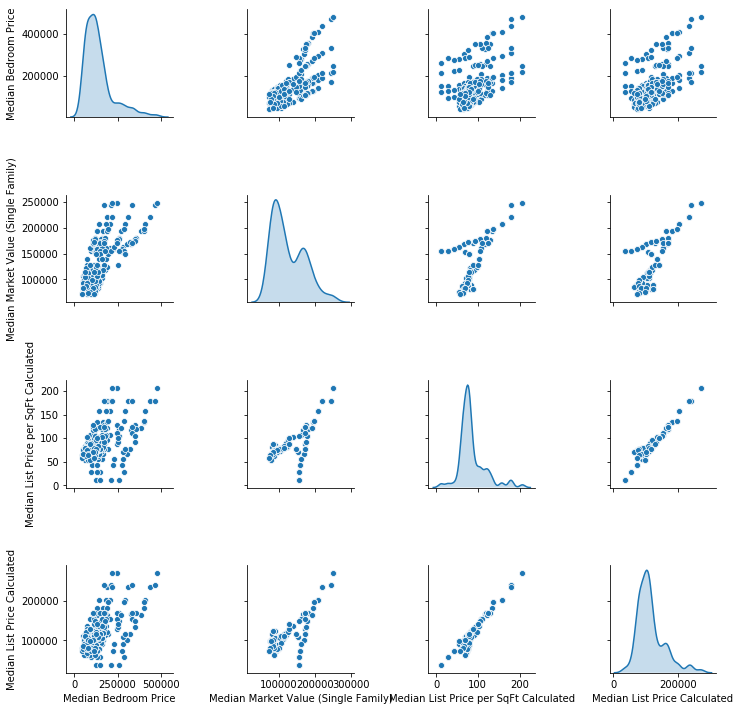

In [141]:
sns.pairplot(train_dataset[["Median Bedroom Price", 
                            "Median Market Value (Single Family)", 
                            "Median List Price per SqFt Calculated",
                            "Median List Price Calculated"]], diag_kind="kde")

In [142]:
train_stats = train_dataset.describe()
train_stats.pop("Median Bedroom Price")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Median Market Value (Single Family),279.0,125948.107527,44433.749951,70944.000000,87312.000000,113300.000000,162344.000000,248645.000000
Median List Price per SqFt Calculated,279.0,85.699970,31.720591,12.289483,67.335166,77.745670,92.222529,206.825441
Median List Price Calculated,279.0,116476.250834,42457.013772,37866.494919,88085.783506,106906.415116,131721.867986,270719.672053
46219,279.0,0.336918,0.473506,0.000000,0.000000,0.000000,1.000000,1.000000
46220,279.0,0.347670,0.477086,0.000000,0.000000,0.000000,1.000000,1.000000
46227,279.0,0.315412,0.465515,0.000000,0.000000,0.000000,1.000000,1.000000
1Br,279.0,0.218638,0.414065,0.000000,0.000000,0.000000,0.000000,1.000000
2Br,279.0,0.175627,0.381186,0.000000,0.000000,0.000000,0.000000,1.000000
3Br,279.0,0.204301,0.403914,0.000000,0.000000,0.000000,0.000000,1.000000
4Br,279.0,0.200717,0.401256,0.000000,0.000000,0.000000,0.000000,1.000000


In [143]:
train_labels = train_dataset.pop("Median Bedroom Price")
test_labels = test_dataset.pop("Median Bedroom Price")

In [144]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [145]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [146]:
model = build_model()

In [147]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [148]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.26496333],
       [-0.03582357],
       [ 0.11792781],
       [-0.18697605],
       [ 0.16653559],
       [ 0.46371526],
       [ 0.41521338],
       [ 0.6373692 ],
       [ 0.74981654],
       [-0.07765213]], dtype=float32)

In [149]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:24608836070.7444,  mae:135906.4375,  mse:24608837632.0000,  val_loss:32620090221.7143,  val_mae:153877.6406,  val_mse:32620089344.0000,  
....................................................................................................
Epoch: 100, loss:23599638950.4574,  mae:133396.4062,  mse:23599636480.0000,  val_loss:31139669138.2857,  val_mae:150710.3594,  val_mse:31139670016.0000,  
....................................................................................................
Epoch: 200, loss:18395438681.5426,  mae:119688.7188,  mse:18395439104.0000,  val_loss:23574599094.8571,  val_mae:133422.0938,  val_mse:23574599680.0000,  
....................................................................................................
Epoch: 300, loss:8831489825.2915,  mae:85292.3672,  mse:8831490048.0000,  val_loss:10166436644.5714,  val_mae:90546.6406,  val_mse:10166436864.0000,  
..................................................................................

In [150]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,1.447347e+08,8517.376953,144734720.0,2.608698e+08,11388.615234,260869792.0,995
996,1.448459e+08,8512.991211,144845936.0,2.602797e+08,11373.635742,260279728.0,996
997,1.448236e+08,8509.313477,144823584.0,2.598432e+08,11364.384766,259843232.0,997
998,1.439643e+08,8508.658203,143964320.0,2.592157e+08,11349.147461,259215696.0,998
999,1.437653e+08,8477.840820,143765296.0,2.582960e+08,11327.104492,258296032.0,999


In [151]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Median Bedroom Price]')

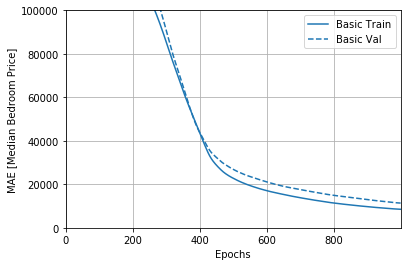

In [152]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 100000])
plt.ylabel('MAE [Median Bedroom Price]')

In [153]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: ${:5.2f} ".format(mae))

70/70 - 0s - loss: 228592736.9143 - mae: 10466.5928 - mse: 228592720.0000
Testing set Mean Abs Error: $10466.59 


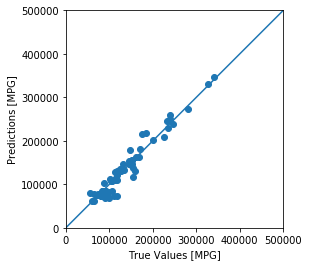

In [154]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Median Bedroom Price]')
plt.ylabel('Predictions [Median Bedroom Price]')
lims = [0, 500000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)